In [9]:
import geopandas as gpd

shapefile = gpd.read_file("SidewalksStepsBlockgroup.shp")
#print(shapefile.head(5))
#print(shapefile.describe())
print(shapefile.columns)
#shapefile.plot()

Index(['FID_1', 'OBJECTID', 'FID_1_1', 'Source', 'Material', 'Width', 'Notes',
       'Date', 'LengthMile', 'Type', 'Elevation', 'MPH', 'Municipali',
       'County', 'Neighborho', 'Type_Name', 'RoadName', 'Subdiv_Nam',
       'Unincorp_M', 'Shape__Len', 'Shape_Leng', 'FID_2', 'GEOID', 'NAMELSAD',
       'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'OBJECTID_1', 'SHAPE_Le_1',
       'SHAPE_Area', 'FIPS_Num', 'Distance', 'geometry'],
      dtype='object')


In [10]:
shapefile.head(5)

FID_1  OBJECTID  FID_1_1 Source Material  Width Notes Date  LengthMile   
0  23411     23441    23441    NaN      NaN      0   NaN  NaN    0.072439  \
1  23412     23442    23442    NaN      NaN      0   NaN  NaN    0.062109   
2  23413     23443    23443    NaN      NaN      0   NaN  NaN    0.015296   
3  23414     23444    23444    NaN      NaN      0   NaN  NaN    0.026267   
4  23415     23445    23445    NaN      NaN      0   NaN  NaN    0.026619   

   Type  ...   ALAND  AWATER     INTPTLAT     INTPTLON OBJECTID_1   
0     1  ...  389986       0  +40.4621221  -79.9609470         34  \
1     1  ...  389986       0  +40.4621221  -79.9609470         34   
2     1  ...  389986       0  +40.4621221  -79.9609470         34   
3     1  ...  389986       0  +40.4621221  -79.9609470         34   
4     1  ...  389986       0  +40.4621221  -79.9609470         34   

     SHAPE_Le_1    SHAPE_Area      FIPS_Num Distance   
0  11188.102692  4.197425e+06  4.200306e+11      0.0  \
1  11188.102692  4.197425e+06  4.200306e+11      0.0   
2  11188.102692  4.197425e+06  4.200306e+11      0.0   
3  11188.102692  4.197425e+06  4.200306e+11      0.0   
4  11188.102692  4.197425e+06  4.200306e+11      0.0   

                                            geometry  
0  LINESTRING (-79.96323 40.46424, -79.96317 40.4...  
1  LINESTRING (-79.96386 40.46341, -79.96269 40.4...  
2  LINESTRING (-79.96257 40.46352, -79.96233 40.4...  
3  LINESTRING (-79.96229 40.46355, -79.96240 40.4...  
4  LINESTRING (-79.96241 40.46398, -79.96252 40.4...  

[5 rows x 34 columns]

In [11]:
shapefile['geometry']

0         LINESTRING (-79.96323 40.46424, -79.96317 40.4...
1         LINESTRING (-79.96386 40.46341, -79.96269 40.4...
2         LINESTRING (-79.96257 40.46352, -79.96233 40.4...
3         LINESTRING (-79.96229 40.46355, -79.96240 40.4...
4         LINESTRING (-79.96241 40.46398, -79.96252 40.4...
                                ...                        
209273    LINESTRING (-79.54269 40.14793, -79.54268 40.1...
209274    LINESTRING (-79.54268 40.14793, -79.54267 40.1...
209275    LINESTRING (-79.54381 40.14659, -79.54380 40.1...
209276    LINESTRING (-79.54388 40.14651, -79.54387 40.1...
209277    LINESTRING (-79.54122 40.14956, -79.54120 40.1...
Name: geometry, Length: 209278, dtype: geometry

In [12]:
#https://data.wprdc.org/dataset/sidewalk-to-street-walkability-ratio

AttributeError: 'GeoDataFrame' object has no attribute 'graph'

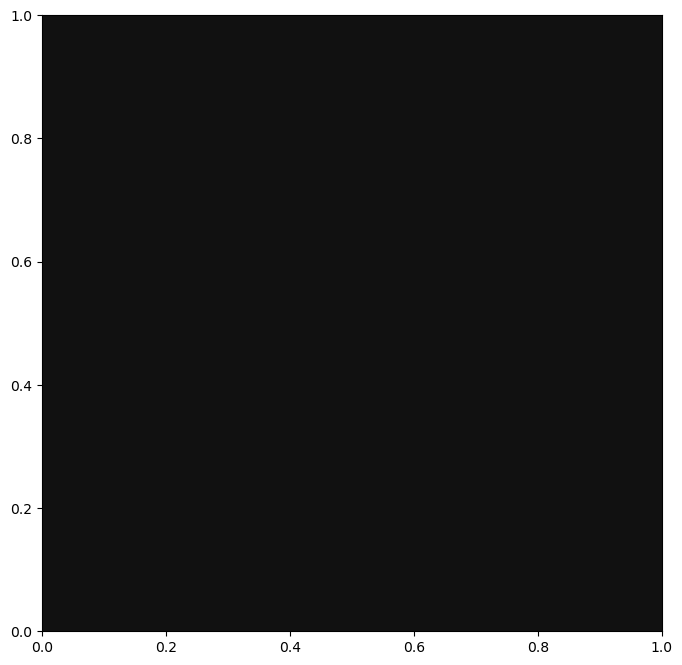

In [13]:
import osmnx as ox
ox.plot_graph(shapefile, show=False, close=False)

<AxesSubplot:>

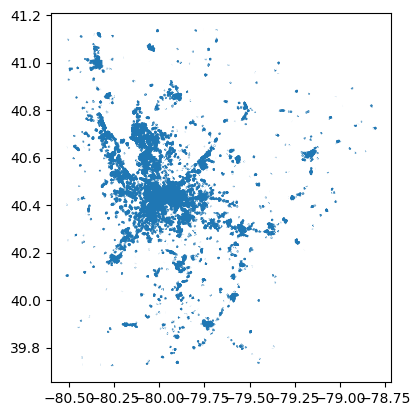

In [14]:
shapefile.plot()

In [15]:
pip install folium


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
#ox.plot_graph_folium(shapefile)

In [17]:
tiles='OpenStreetMap'
cntr_pt = [shapefile['INTPTLAT'].astype(float).mean(), shapefile['INTPTLON'].astype(float).mean()]

# Create the map
map = folium.Map(location=cntr_pt, zoom_start=13, tiles=tiles)
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

NameError: name 'G' is not defined

In [4]:
import osmnx as ox

PLACE_NAME = " North Oakland, Pittsburgh, United states"
graph = osmnx.graph_from_place(
    PLACE_NAME,
    network_type="walk"
    
)

In [5]:
# network of the canals of pittsburgh
place = "Pittsburgh, United states"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')
ox.plot_graph_folium(G, node_size=0, edge_color="w", edge_linewidth=0.2)

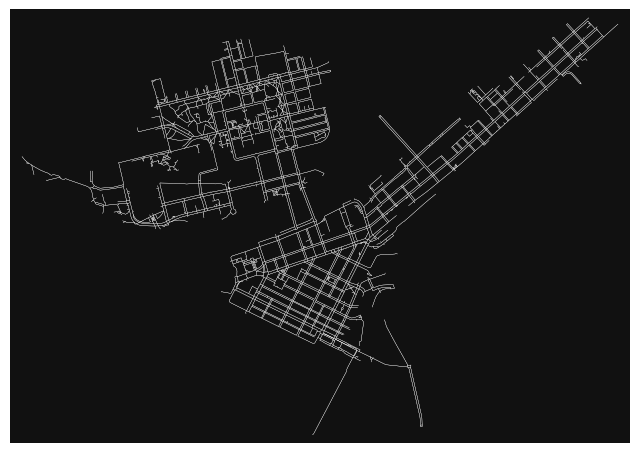

In [6]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [7]:
map

map

In [8]:
folium.PolyLine(shapefile[['INTPTLAT', 'INTPTLON']].astype(float).values,
                weight=2
).add_to(map)
# map.save(f’./Figures/map.html')


NameError: name 'shapefile' is not defined

In [ ]:
map

In [9]:
shapefile['INTPTLAT'].astype(float).mean()

NameError: name 'shapefile' is not defined

In [10]:
import geopandas as gpd
import networkx as nx
import random
import matplotlib.pyplot as plt

# Step 1: Convert Shapefile to Graph
def create_sidewalk_graph(shapefile_path):
    gdf = gpd.read_file(shapefile_path)
    graph = nx.Graph()

    for index, row in gdf.iterrows():
        start_point = row.geometry.coords[0]
        end_point = row.geometry.coords[-1]
        distance = row['distance']  # Replace 'distance' with the name of the attribute storing the distances

        # Add sidewalk segment nodes to the graph
        graph.add_node(start_point, pos=start_point)
        graph.add_node(end_point, pos=end_point)

        # Add edge between sidewalk segment nodes with distance as weight
        graph.add_edge(start_point, end_point, weight=distance)

    return graph

# Step 2: Implement Dijkstra's Algorithm
def dijkstra_shortest_path(graph, source):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0
    priority_queue = [(0, source)]

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, edge_weight in graph[current_node].items():
            distance = current_distance + edge_weight['weight']
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))

    return distances

# Step 3: Compute Random Shortest Paths
def compute_random_shortest_paths(graph, num_paths):
    all_nodes = list(graph.nodes())
    shortest_paths = []

    for _ in range(num_paths):
        source, target = random.sample(all_nodes, 2)
        shortest_path = nx.shortest_path(graph, source=source, target=target, weight='weight')
        shortest_paths.append(shortest_path)

    return shortest_paths

# Step 4: Visualization (Optional)
def plot_sidewalk_network(graph, shortest_paths):
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=False, node_size=10, node_color='blue')

    for path in shortest_paths:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)

    plt.show()

if __name__ == "__main__":
    shapefile_path = "path/to/your/shapefile.shp"
    num_paths_to_compute = 5

    sidewalk_graph = create_sidewalk_graph(shapefile_path)
    random_shortest_paths = compute_random_shortest_paths(sidewalk_graph, num_paths_to_compute)
    plot_sidewalk_network(sidewalk_graph, random_shortest_paths)


DriverError: path/to/your/shapefile.shp: No such file or directory

In [ ]:
import osmnx as ox
import folium
import geopandas as gpd


In [ ]:
# Get the center coordinates of the place to center the Folium map
place_center = ox.geocode(place)

# Create the Folium map and plot the graph on it
m = folium.Map(location=[place_center[0], place_center[1]], zoom_start=13)
ox.plot_graph_folium(G, graph_map=m, node_size=0, edge_color="w", edge_linewidth=0.2)

# Save the Folium map as an interactive HTML file
m.save("canals_network_pittsburgh.html")


In [ ]:
pip install igraph

In [ ]:
pip install pycairo

In [ ]:
pip install cairocffi

In [ ]:
pip install --upgrade pip

In [ ]:
import osmnx as ox
import igraph as ig

place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Convert the networkx graph to an igraph graph
G_igraph = ig.Graph.TupleList(G.edges(), directed=False)

# Print some basic information about the graph
print("Number of nodes:", G_igraph.vcount())
print("Number of edges:", G_igraph.ecount())

# Plot the igraph graph (you may need to install folium: pip install folium)
#ig.plot(G_igraph, layout=G_igraph.layout("fr"), bbox=(500, 500))


In [11]:
import osmnx as ox
import igraph as ig

# Function to convert coordinates to (lat, lon) format
def get_coordinates(address):
    location = ox.geocode(address)
    return (location[1], location[0])  # Reversed order: (latitude, longitude)

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Convert the networkx graph to an igraph graph
edges = [(u, v, G[u][v][0]['length']) for u, v in G.edges()]
G_igraph = ig.Graph.TupleList(edges, directed=False, edge_attrs={'length': 'float'})

# Print some basic information about the graph
print("Number of nodes:", G_igraph.vcount())
print("Number of edges:", G_igraph.ecount())

# Define the source and target addresses
source_address = "3959 Fifth Ave, Pittsburgh, PA 15260"
target_address = "612 Smithfield St, Pittsburgh, PA 15222"

source_coords = get_coordinates(source_address)
target_coords = get_coordinates(target_address)

# Find the nearest nodes to the provided coordinates in the igraph graph
def find_nearest_node(graph, latitude, longitude):
    distances = [(i, ox.distance.euclidean_dist_vec((latitude, longitude), (v['latitude'], v['longitude'])))
                 for i, v in enumerate(graph.vs)]
    nearest_node = min(distances, key=lambda x: x[1])[0]
    return nearest_node

source_node = find_nearest_node(G_igraph, source_coords[0], source_coords[1])
target_node = find_nearest_node(G_igraph, target_coords[0], target_coords[1])

# Find the shortest path using Dijkstra's algorithm in the igraph graph
try:
    shortest_path_indices = G_igraph.get_shortest_paths(source_node, to=target_node, weights='length')[0]
    shortest_path_nodes = [G_igraph.vs[node_index]['name'] for node_index in shortest_path_indices]
    shortest_path_length = G_igraph.shortest_paths(source=source_node, target=target_node, weights='length')[0][0]
    print("Shortest path nodes:", shortest_path_nodes)
    print("Shortest path length (in meters):", shortest_path_length)
except Exception as e:
    print("Error:", e)


Number of nodes: 2051
Number of edges: 5609


KeyError: 'Attribute does not exist'

In [ ]:
import osmnx as ox
import folium
import igraph

# Function to convert coordinates to (lat, lon) format
def get_coordinates(address):
    location = ox.geocode(address)
    return (location[1], location[0])  # Reversed order: (latitude, longitude)

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Convert the networkx graph to an igraph graph
edges = [(u, v, G[u][v][0]['length']) for u, v in G.edges()]
G_igraph = igraph.Graph.TupleList(edges, directed=False, edge_attrs={'length': 'float'})

# Define the source and target addresses
source_address = "3959 Fifth Ave, Pittsburgh, PA 15260"
target_address = "612 Smithfield St, Pittsburgh, PA 15222"

source_coords = get_coordinates(source_address)
target_coords = get_coordinates(target_address)

# Find the nearest nodes to the provided coordinates in the igraph graph
def find_nearest_node(graph, latitude, longitude):
    distances = [(i, ox.distance.euclidean_dist_vec((latitude, longitude), (v['y'], v['x'])))
                 for i, v in enumerate(graph.vs)]
    nearest_node = min(distances, key=lambda x: x[1])[0]
    return nearest_node

source_node = find_nearest_node(G_igraph, source_coords[0], source_coords[1])
target_node = find_nearest_node(G_igraph, target_coords[0], target_coords[1])

# Find the shortest path using Dijkstra's algorithm in the igraph graph
shortest_path_indices = G_igraph.get_shortest_paths(source_node, to=target_node, weights='length')[0]
shortest_path_nodes = [G_igraph.vs[node_index]['name'] for node_index in shortest_path_indices]
shortest_path_length = G_igraph.shortest_paths(source=source_node, target=target_node, weights='length')[0][0]

# Create a folium map
map_center = (G.nodes[source_node]['y'], G.nodes[source_node]['x'])
m = folium.Map(location=map_center, zoom_start=15)

# Add network graph to the map
edges_gdf = ox.graph_to_gdfs(G, nodes=False, fill_edge_geometry=True)
for _, edge in edges_gdf.iterrows():
    folium.PolyLine(locations=edge['geometry']).add_to(m)

# Add markers for the source and target locations
folium.Marker(location=source_coords, popup='Source').add_to(m)
folium.Marker(location=target_coords, popup='Target').add_to(m)

# Add shortest path to the map
shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path_nodes]
folium.PolyLine(locations=shortest_path_coords, color='red', popup=f'Shortest Path Length: {shortest_path_length} meters').add_to(m)

# Display the map
m


In [ ]:
import osmnx as ox
import folium

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Create a folium map
map_center = (G.nodes[list(G.nodes())[0]]['y'], G.nodes[list(G.nodes())[0]]['x'])
m = folium.Map(location=map_center, zoom_start=15)

# Add network graph edges to the map as polylines
for u, v, data in G.edges(keys=False, data=True):
    if 'geometry' in data:
        coords = list(data['geometry'].coords)
        folium.PolyLine(locations=coords).add_to(m)

# Display the map
m


In [ ]:
import osmnx as ox
import folium
import networkx as nx

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Create a folium map
map_center = (G.nodes[list(G.nodes())[0]]['y'], G.nodes[list(G.nodes())[0]]['x'])
m = folium.Map(location=map_center, zoom_start=15)

# Add network graph edges to the map as polylines
for u, v, data in G.edges(keys=False, data=True):
    if 'geometry' in data:
        coords = list(data['geometry'].coords)
        folium.PolyLine(locations=coords).add_to(m)

# Define the source and target coordinates (latitude, longitude)
source_coords = (40.455, -79.979)  # Replace with your desired source coordinates
target_coords = (45.456, -79.978)  # Replace with your desired target coordinates

# Find the nearest nodes in the network to the provided coordinates
source_node = ox.distance.nearest_nodes(G, source_coords[1], source_coords[0])
target_node = ox.distance.nearest_nodes(G, target_coords[1], target_coords[0])

# Find the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='length')

# Add the shortest path to the map as a polyline
shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]
folium.PolyLine(locations=shortest_path_coords, color='red', weight=5).add_to(m)

# Display the map
m


In [ ]:
import osmnx as ox
import folium
import networkx as nx
import random

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Create a folium map
map_center = (G.nodes[list(G.nodes())[0]]['y'], G.nodes[list(G.nodes())[0]]['x'])
m = folium.Map(location=map_center, zoom_start=15)

# Add network graph edges to the map as polylines
for u, v, data in G.edges(keys=False, data=True):
    if 'geometry' in data:
        coords = list(data['geometry'].coords)
        folium.PolyLine(locations=coords).add_to(m)

# Define the number of random shortest paths to find
num_paths = 5

# Find and display random shortest paths
for _ in range(num_paths):
    # Generate random source and target coordinates
    source_coords = (random.uniform(40.453, 40.457), random.uniform(-79.983, -79.976))
    target_coords = (random.uniform(40.453, 40.457), random.uniform(-79.983, -79.976))

    # Find the nearest nodes in the network to the provided coordinates
    source_node = ox.distance.nearest_nodes(G, source_coords[1], source_coords[0])
    target_node = ox.distance.nearest_nodes(G, target_coords[1], target_coords[0])

    # Find the shortest path using Dijkstra's algorithm
    shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='length')

    # Add the shortest path to the map as a polyline with a random color
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]
    folium.PolyLine(locations=shortest_path_coords, color=random_color, weight=3).add_to(m)

# Display the map
m


In [ ]:
import osmnx as ox
import folium
import networkx as nx
import random
from folium import Icon

# Define the place and obtain the network graph
place = "Pittsburgh, United States"
G = ox.graph_from_place(place, custom_filter='["highway"~"footway"]')

# Create a folium map
map_center = (G.nodes[list(G.nodes())[0]]['y'], G.nodes[list(G.nodes())[0]]['x'])
m = folium.Map(location=map_center, zoom_start=15)

# Add network graph edges to the map as polylines
for u, v, data in G.edges(keys=False, data=True):
    if 'geometry' in data:
        coords = list(data['geometry'].coords)
        folium.PolyLine(locations=coords).add_to(m)

# Function to find a random point in the network
def random_point_in_network():
    node = random.choice(list(G.nodes()))
    return G.nodes[node]['y'], G.nodes[node]['x']

# Function to find the nearest node in the network to the provided coordinates
def nearest_node_to_coords(coords):
    return ox.distance.nearest_nodes(G, coords[1], coords[0])

# Find and highlight random shortest paths
num_paths = 5  # Number of random shortest paths to find
for i in range(num_paths):
    source_coords = random_point_in_network()
    target_coords = random_point_in_network()
    
    source_node = nearest_node_to_coords(source_coords)
    target_node = nearest_node_to_coords(target_coords)

    shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='length')
    shortest_path_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

    # Generate a random color for the path
    random_color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    
    # Add the path to the map as a polyline with a custom color
    folium.PolyLine(locations=shortest_path_coords, color=random_color, weight=5).add_to(m)

    # Add an icon at the source and target nodes
    icon_color = 'white' if random_color != '#ffffff' else 'black'
    folium.Marker(location=source_coords, icon=Icon(color=random_color, icon_color=icon_color, icon='cloud')).add_to(m)
    folium.Marker(location=target_coords, icon=Icon(color=random_color, icon_color=icon_color, icon='cloud')).add_to(m)

# Display the map
m
